# Question 1

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Load Dataset

In [2]:
bank = pd.read_csv('BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#convert dataset into np
bank = np.array(bank)

X_bank = bank[:, 0:2]
y_bank = bank[:, 4]

Gradient Descent

In [8]:
def sigmoid(z):
    return np.exp(-z) / (1 + np.exp(-z))


def gradient(X, y, lamb = 0.1, iter = 1000):
    y[y == 0] = -1
    beta_0 = 0
    beta_1 = 0
    beta_2 = 0
    for i in range(iter):
        #initialize inside summation
        inp = (np.full((X.shape[0], 1), beta_0) + (beta_1 * X[:, 0]) + (beta_2 * X[:, 1])) * y
        inp2 = sigmoid(inp) 
        #set up the betas
        beta_0 = beta_0 + (lamb * (inp2 * y).mean())
        beta_1 = beta_1 + (lamb * (inp2 * X[:, 0] * y).mean())
        beta_2 = beta_2 + (lamb * (inp2 * X[:, 1] * y).mean())
    return beta_0, beta_1, beta_2
        

In [9]:
b0, b1, b2 = gradient(X_bank, y_bank, iter = 1000)

In [10]:
print(b0)
print(b1)
print(b2)

0.5848586077190072
-1.1102936459099635
-0.27235649484799995


Plot

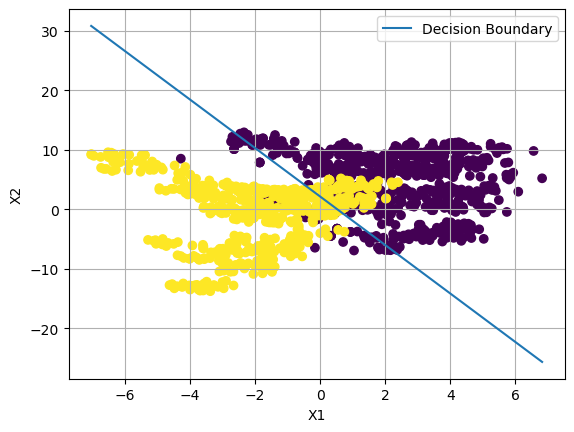

In [11]:
plt.scatter(X_bank[:, 0], X_bank[:, 1], c=y_bank, cmap="viridis")
plt.xlabel("X1")
plt.ylabel("X2")
X_new = np.linspace(min(X_bank[:,0]),max(X_bank[:,0]),1000)
YY =  (-b0 - (b1*X_new)) / b2
plt.plot(X_new,YY,label= "Decision Boundary")
plt.grid()
plt.legend()

# Question 2

Split dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.3, random_state=42)

Decision Boundary Function

In [14]:
def plot_decision_boundaries(X, y, model, title, subplot_index, crop = 1):
    plt.subplot(subplot_index)
    x_min, x_max = X[:, 0].min() - crop, X[:, 0].max() + crop
    y_min, y_max = X[:, 1].min() - crop, X[:, 1].max() + crop
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')



In [15]:
#fit
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

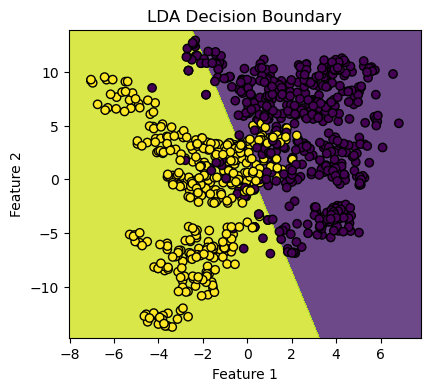

In [16]:
#plot
plt.figure(figsize=(10, 4))
plot_decision_boundaries(X_train, y_train, lda, "LDA Decision Boundary", 121)

# Question 3

In [6]:
#fit
qda = QDA()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

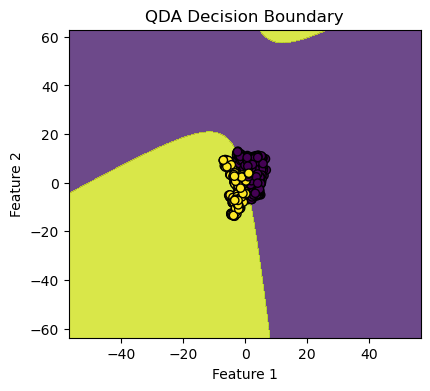

In [7]:
plt.figure(figsize = (10, 4))
plot_decision_boundaries(X_train, y_train, qda, "QDA Decision Boundary", 121, 50)

By zooming out, the decisioun boundary of the QDA happens to be a hyperbola